In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor


In [18]:
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Project 2
# REGRESSION PART A (1)

In [19]:
#making sure data is standardized
print("Means of X columns", np.mean(X, axis=0))
print("SDs of X columns", np.std(X, axis=0))

Means of X columns [ 2.44487823e-16  1.45428102e-16 -1.33836007e-16 -8.11446654e-17
 -3.99690168e-15  9.69520678e-17  2.78210281e-16 -8.43061459e-17
 -2.00227096e-16]
SDs of X columns [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
#defining methods to calculate test and train error 

def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum ([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [21]:
#REGRESSION PART A (1) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = train_error(model, X_train, y_train)
test_rmse = test_error(model, X_test, y_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

#printing weights
#print(model.coef_)

Train RMSE: 1475190.868741403
Test RMSE: 1499636.6903304493
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073519


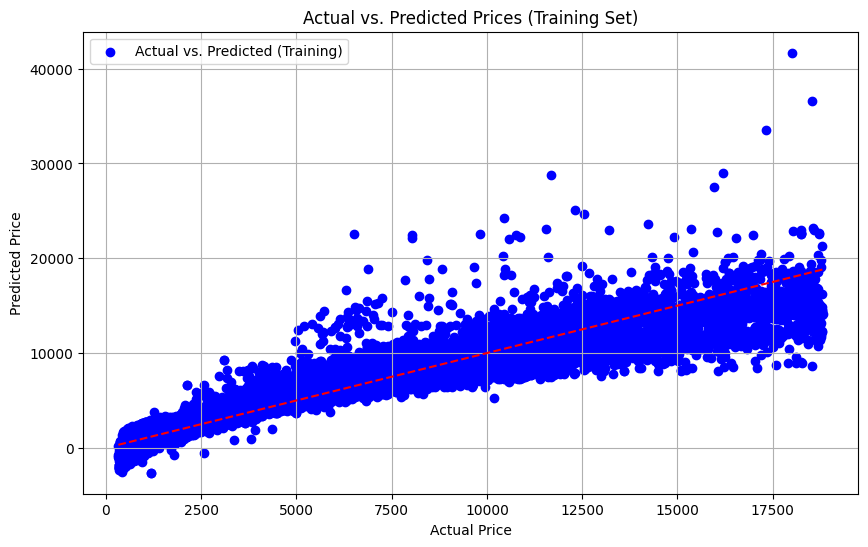

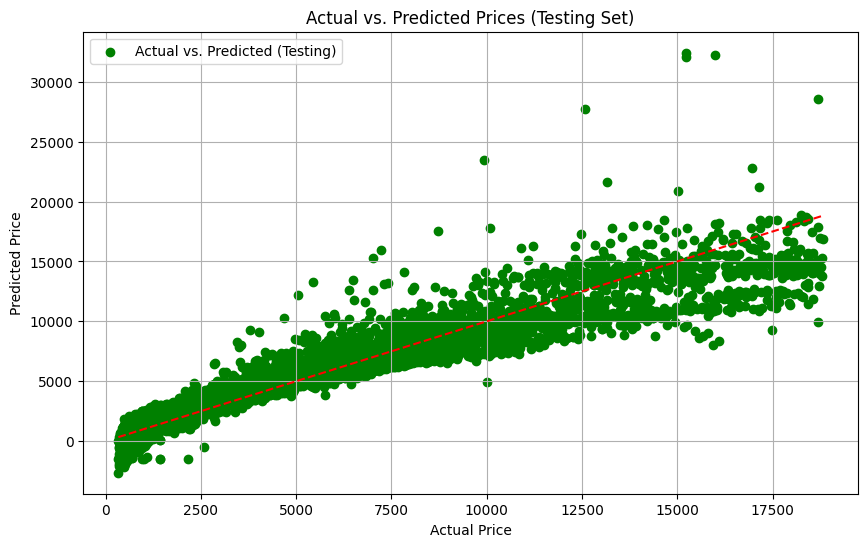

In [22]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

## REGRESSION PART A (2)

In [27]:
#introducing a regularization parameter lambda, estimating generalization error and calculating test error

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

lambda_values = [0, 0.01, 1, 10, 20, 100, 30]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

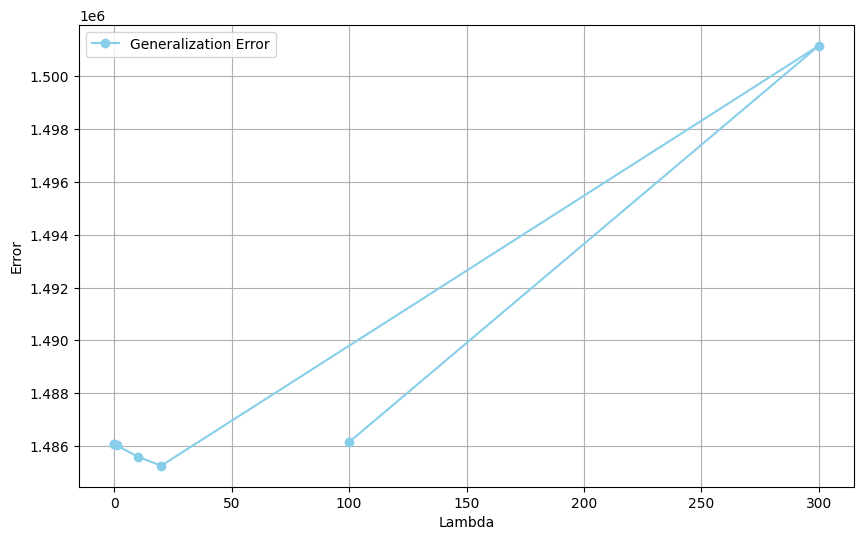

In [28]:
#plotting generalization error (and test error) as a function of lambda
#8.1.1

lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
#plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# REGRESSION PART B (1)

First, define an artificial neural network

In [4]:
from sklearn.neural_network import MLPRegressor

def neural_network(h, X_train, y_train, X_test, y_test):
    ann_model = MLPRegressor(
            hidden_layer_sizes=(h,),
            max_iter=5000,  # Increase the number of iterations
            learning_rate_init=0.001,  # Adjust the learning rate
            solver='adam',  # Try different solvers
            early_stopping=True,  # Enable early stopping
            random_state=42
        )
    ann_model.fit(X_train, y_train)
    y_est = ann_model.predict(X_test)
    est_error = sum((y_est-y_test)**2)/len(y_est)

    return est_error

In [5]:
# Testing different h_values
from sklearn.model_selection import KFold 

h_values = [60, 70, 80]
df = pd.DataFrame(columns=['h', 'error'])

kf = KFold(n_splits=10, shuffle=True)
rows = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    for h in h_values:
        error = neural_network(h, X_train, y_train, X_test, y_test)
        rows.append({'h': h, 'error': error})

df = pd.DataFrame(rows)
            

In [6]:
#Printing results of mean errors of different amount of h units to choose optimal range
mean_errors = []
for h in h_values:
    filtered_rows = df[df['h'] == h]
    mean_error = filtered_rows['error'].mean()
    print(f'Mean error where h = {h}: {mean_error}')

Mean error where h = 60: 965462.719364437
Mean error where h = 70: 973734.97230228
Mean error where h = 80: 948662.9874687346


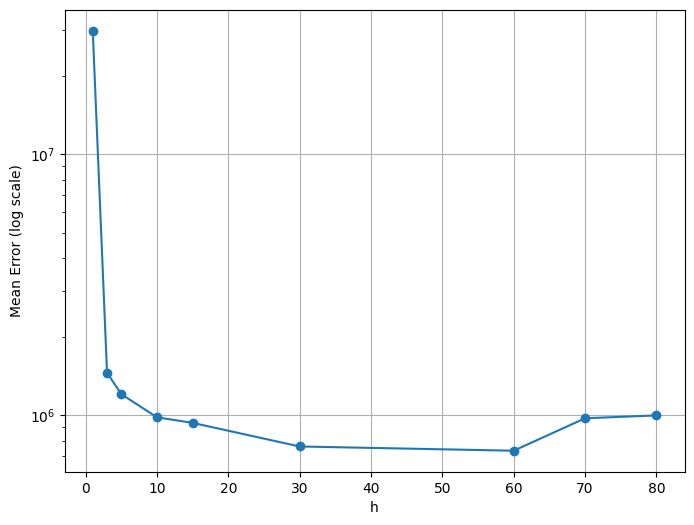

In [13]:
data = {
    'h': [1, 3, 5, 10, 15, 30, 60, 70, 80],
    'mean_error': [
        29785634.19869898,
        1455222.0636909069,
        1204864.8829694863,
        982155.736068495,
        934992.5681984939,
        759173.8176840226,
        731245.5823711553,
        973734.97230228,
        998662.9874687346
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.plot(df['h'], df['mean_error'], marker='o', linestyle='-')
plt.xlabel('h')
plt.ylabel('Mean Error (log scale)')
plt.grid(True)
# Set y-axis to logarithmic scale
plt.yscale('log')
plt.savefig('mean_error_h.png')
plt.show()

Mean error where h = 1: 29785634.19869898

Mean error where h = 3: 1455222.0636909069

Mean error where h = 5: 1204864.8829694863

Mean error where h = 10: 982155.736068495

Mean error where h = 15: 934992.5681984939

Mean error where h = 30: 759173.8176840226

Mean error where h = 60: 731245.5823711553

In [ ]:
data = {
    'h': [1, 3, 5, 10, 15, 30, 60, 70, 80],
    'mean_error': [
        29785634.19869898,
        1455222.0636909069,
        1204864.8829694863,
        982155.736068495,
        934992.5681984939,
        759173.8176840226,
        731245.5823711553,
        973734.97230228,
        948662.9874687346
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.plot(df['h'], df['mean_error'], marker='o', linestyle='-')
plt.title('Mean Error vs. h')
plt.xlabel('h')
plt.ylabel('Mean Error')
plt.grid(True)
plt.savefig('mean_error_h.png')
plt.show()

As you can see, 60 gives thw smallest error on avarage


# REGRESSION PART B (2)

In [ ]:
#2-layer validation
K_outer = 10
K_inner = 10
rows = []


# Define the range of complexity-controlling parameters
lambda_values = [0, 0.1, 10, 30, 40, 50, 60, 100, 1000]
h_values = [1, 5, 15, 30, 60]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=11)
k_outer = 0

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]
    
    k_inner = 1
    
    y_train_outer = y_train_outer.reset_index(drop=True)
    y_test_outer = y_test_outer.reset_index(drop=True)
    
    lambda_in_errors = {lmbda: [] for lmbda in lambda_values} # Initialize dictionary to store errors for each lambda
    ann_in_errors = {h: [] for h in h_values}
    
    for train_inner_index, test_inner_index in inner_cv.split(X_train_outer):
        X_train_inner, X_test_inner = X_train_outer[train_inner_index], X_train_outer[test_inner_index]
        y_train_inner, y_test_inner = y_train_outer[train_inner_index], y_train_outer[test_inner_index]
        
        
        # Train ridge regression models with different lambda values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_train_inner, y_train_inner)
            error = test_error(ridge_model, X_test_inner, y_test_inner)
            lambda_in_errors[lmbda].append(error)
        
        for h in h_values:
            error = neural_network(h, X_train_inner, y_train_inner, X_test_inner, y_test_inner)
            ann_in_errors[h].append(error)
        
        k_inner += 1
        #end of inner loop
    
    
    
    lambda_avg_errors = {lmbda: np.mean(errors) for lmbda, errors in lambda_in_errors.items()}
    best_lambda = min(lambda_avg_errors, key=lambda lmbda: lambda_avg_errors[lmbda])
    
    h_avg_errors = {h: np.mean(errors) for h, errors in ann_in_errors.items()}
    best_h = min(h_avg_errors, key=lambda h: h_avg_errors[h])
    
    
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_train_outer, y_train_outer)
    ridge_error = test_error(ridge_model, X_test_outer, y_test_outer)
    
    
    nn_error = neural_network(best_h, X_train_outer, y_train_outer, X_test_outer, y_test_outer)
    
    # Baseline
    baseline_model = LinearRegression()
    baseline_model.fit(X_train_outer, y_train_outer)
    baseline_error = test_error(baseline_model, X_test_outer, y_test_outer)

    #print(f'Final errors of each fold {k_outer}:', error)
    k_outer += 1
    
    rows.append({'k_outer': k_outer, 'h': best_h, 'NN error': nn_error, 'lambda': best_lambda, 'ridge_error': ridge_error, 'baseline': baseline_error})
    
two_layer_results = pd.DataFrame(rows)

k_outer  lambda   ridge_error      baseline

    1      30  1.553238e+06  1.553685e+06
    
    2      30  1.445183e+06  1.445023e+06
    
    3     100  1.340935e+06  1.331517e+06
    
    4      30  1.536381e+06  1.534923e+06
    
    5      40  1.500460e+06  1.499625e+06
    
    6      30  1.647187e+06  1.651964e+06
    
    7      60  1.467367e+06  1.479242e+06
    
    8      30  1.534091e+06  1.532121e+06
    
    9      40  1.348850e+06  1.348794e+06
    
    10      30  1.463613e+06  1.462055e+06


In [18]:
#This is  data from running 2 layer cross validation (saving ith hard-coded, so we don't loose it)

data = {
    'k_outer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'h': [60, 60, 60, 30, 60, 60, 60, 60, 60, 60],
    'NN error': [701341.659734, 471099.588991, 604797.464416, 759805.722564, 673026.793919, 716873.565070, 710772.105463, 601760.521201, 864380.715567, 484907.337029],
    'lambda': [30, 30, 100, 30, 40, 30, 60, 30, 40, 30],
    'ridge_error': [1.553238e+06, 1.445183e+06, 1.340935e+06, 1.536381e+06, 1.500460e+06, 1.647187e+06, 1.467367e+06, 1.534091e+06, 1.348850e+06, 1.463613e+06],
    'baseline_error': [1.553685e+06, 1.445023e+06, 1.331517e+06, 1.534923e+06, 1.499625e+06, 1.651964e+06, 1.479242e+06, 1.532121e+06, 1.348794e+06, 1.462055e+06]
}

# Create DataFrame
two_layer_table = pd.DataFrame(data)

# Display the DataFrame
print(two_layer_table)

   k_outer   h       NN error  lambda  ridge_error  baseline_error
0        1  60  701341.659734      30    1553238.0       1553685.0
1        2  60  471099.588991      30    1445183.0       1445023.0
2        3  60  604797.464416     100    1340935.0       1331517.0
3        4  30  759805.722564      30    1536381.0       1534923.0
4        5  60  673026.793919      40    1500460.0       1499625.0
5        6  60  716873.565070      30    1647187.0       1651964.0
6        7  60  710772.105463      60    1467367.0       1479242.0
7        8  60  601760.521201      30    1534091.0       1532121.0
8        9  60  864380.715567      40    1348850.0       1348794.0
9       10  60  484907.337029      30    1463613.0       1462055.0


## REGRESSION PART B (3)
setup 1. Paired t-test

H0 : Model MA and MB have the same performance, Z = 0

H1 : Model MA and MB have different performance, Z ̸= 0

In [19]:
import scipy.stats
import scipy.stats as st


In [20]:

def paired_test(zA, zB):
    # compute confidence interval of model A
    alpha = 0.05

    # Compute confidence interval of z = zA-zB and p-value of Null hypothesis
    z = zA - zB
    CI = st.t.interval(
        1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z)
    )  # Confidence interval
    p = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)  # p-value
    return p,CI

In [21]:
print( "p-value of pair: NN and Ridge is", paired_test(two_layer_table['NN error'], 
                                                       two_layer_table['ridge_error'])[0], 
      "and CI is:", paired_test(two_layer_table['NN error'], two_layer_table['ridge_error'])[1])

p-value of pair: NN and Ridge is 2.9460062430836046e-08 and CI is: (-931512.5461484634, -718195.3590607366)


In [22]:
print( "p-value of pair: NN and Baseline is", paired_test(two_layer_table['NN error'], 
                                                       two_layer_table['baseline_error'])[0], 
      "and CI is:", paired_test(two_layer_table['NN error'], two_layer_table['baseline_error'])[1])

p-value of pair: NN and Baseline is 2.9775850391882096e-08 and CI is: (-931828.0398062908, -718208.665402909)


In [23]:
print( "p-value of pair: Ridge and Baseline is", paired_test(two_layer_table['ridge_error'], 
                                                       two_layer_table['baseline_error'])[0], 
      "and CI is:", paired_test(two_layer_table['ridge_error'], two_layer_table['baseline_error'])[1])

p-value of pair: Ridge and Baseline is 0.9252969401364426 and CI is: (-4021.3142205642075, 3692.5142205642073)


P-value is statistically significant in paired test Ridge and Baseline, therefore there is evidence to aprove null hypothesis in this case. In other cases null hypothesis is rejected

# Classification part 1

Corrupted data in x:  8
Corrupted data in y:  7
Corrupted data in z:  20
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  

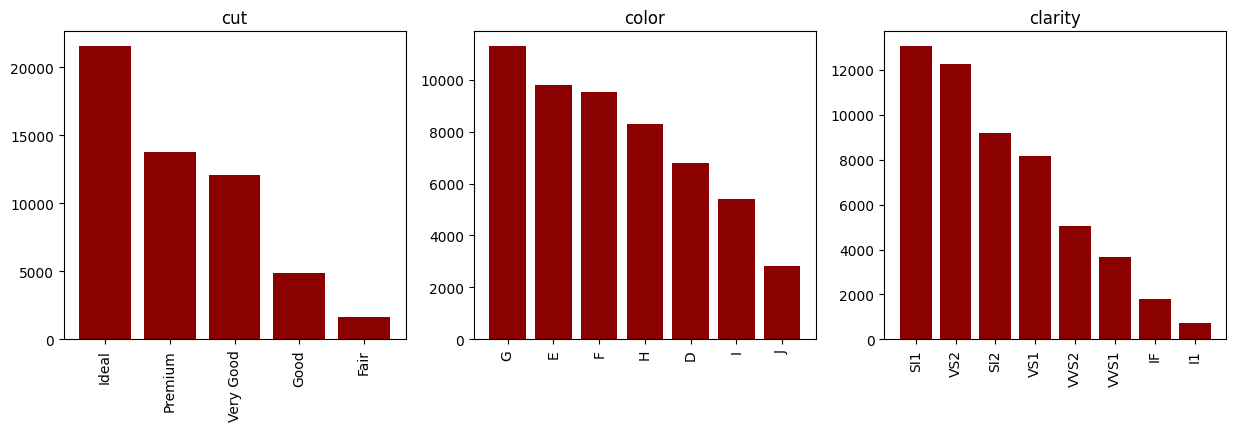

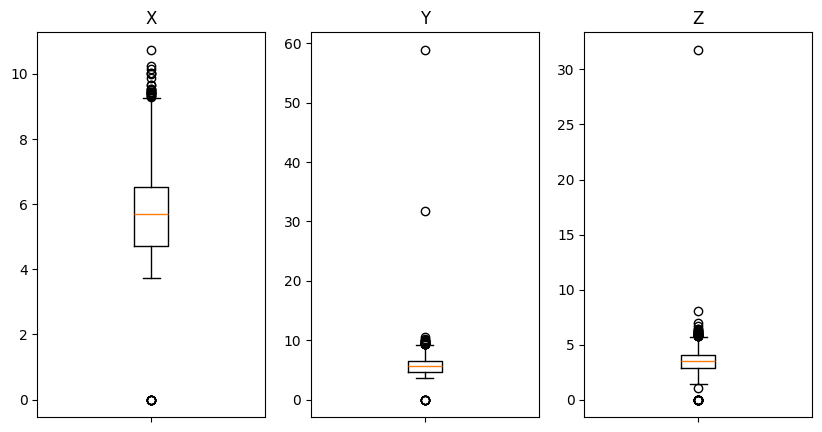

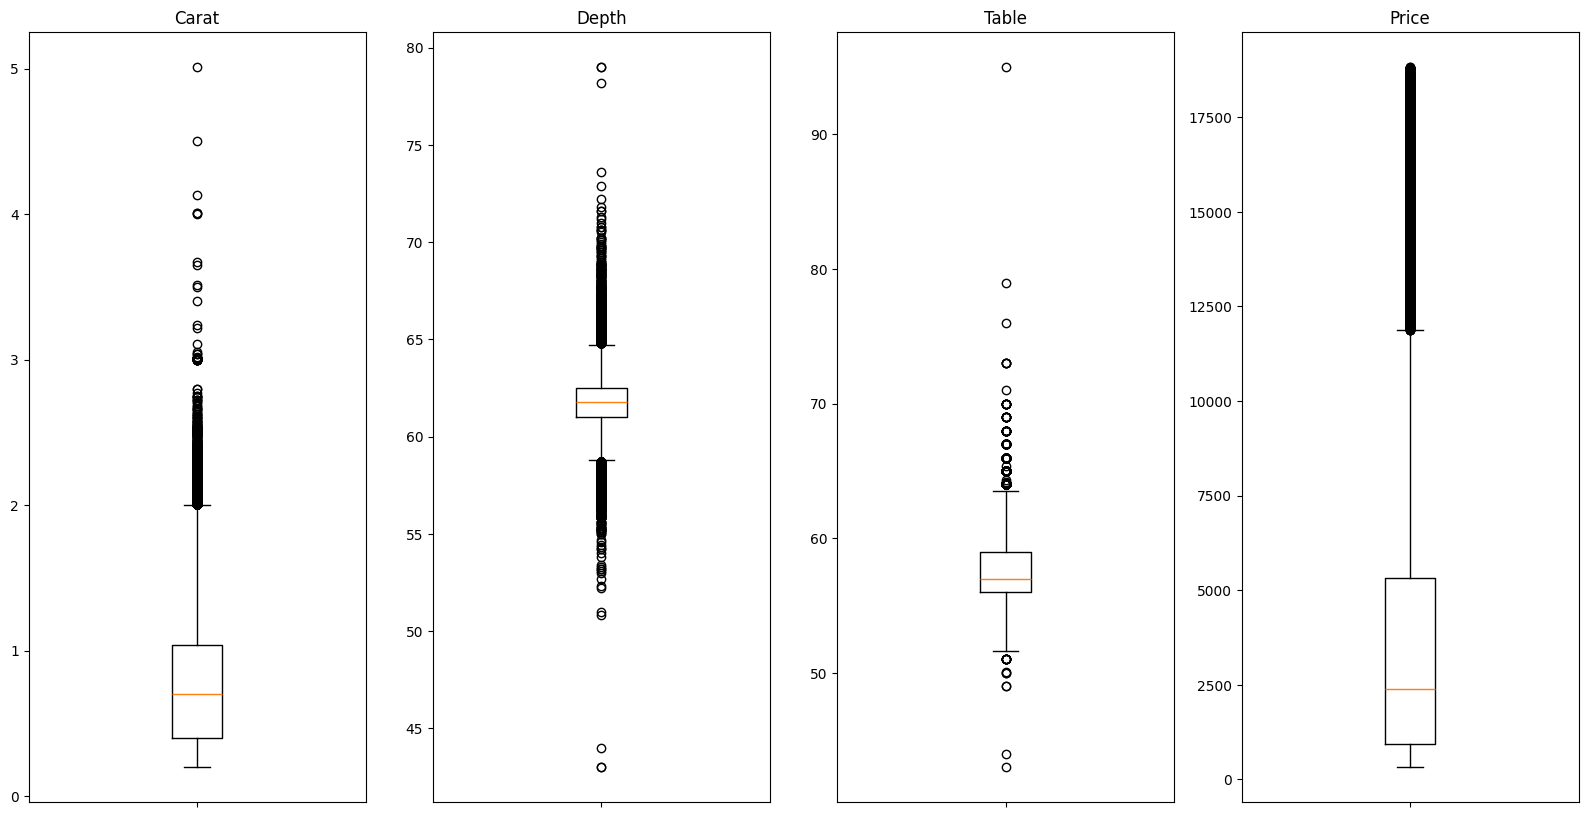

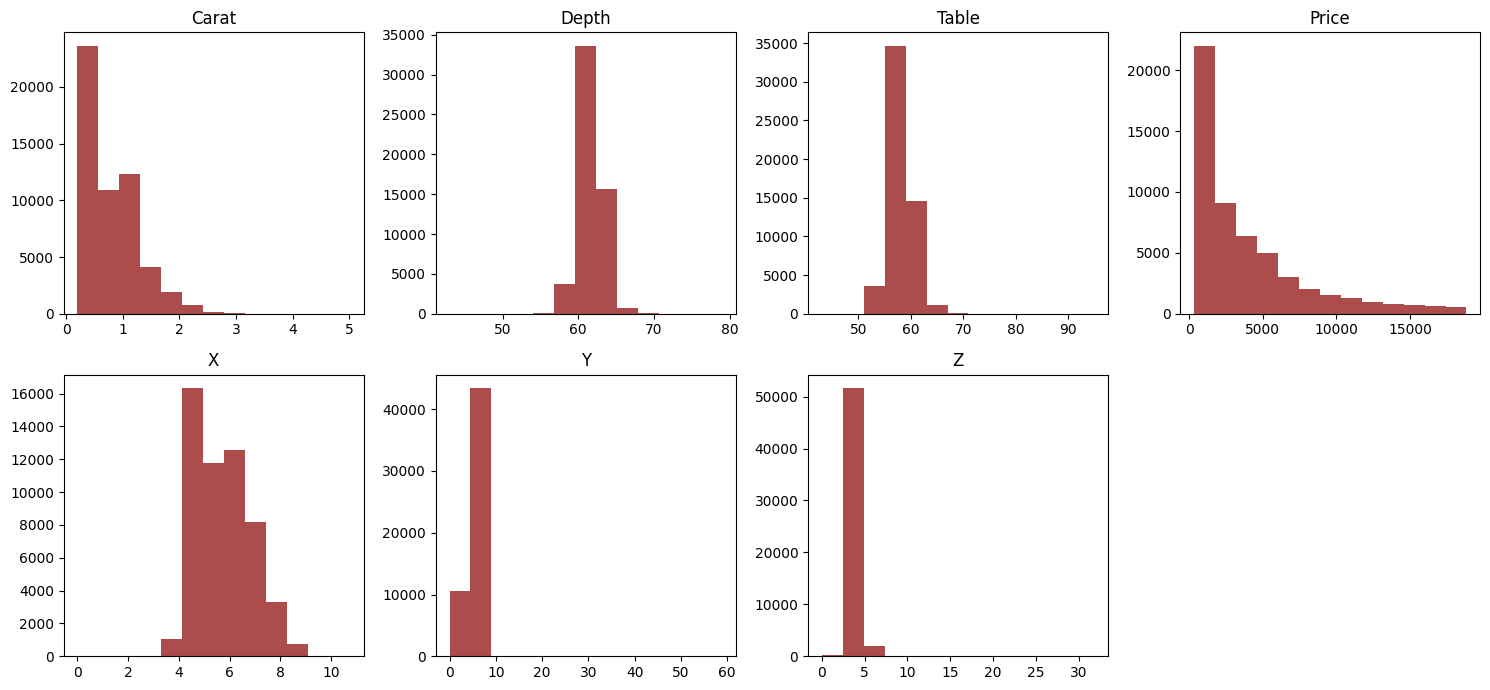

Carat: reject H0
Depth: reject H0
Table: reject H0
Price: reject H0
X: reject H0
Y: reject H0
Z: reject H0


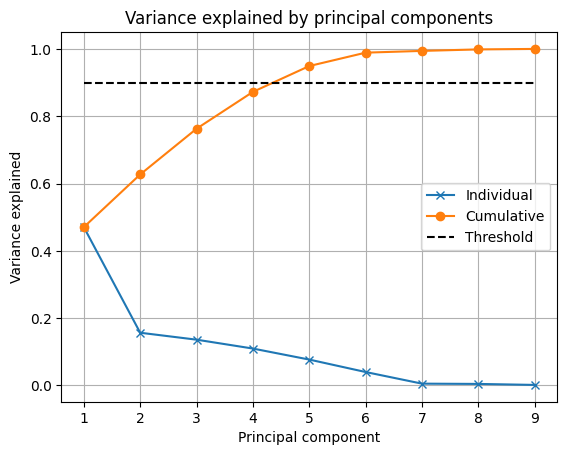

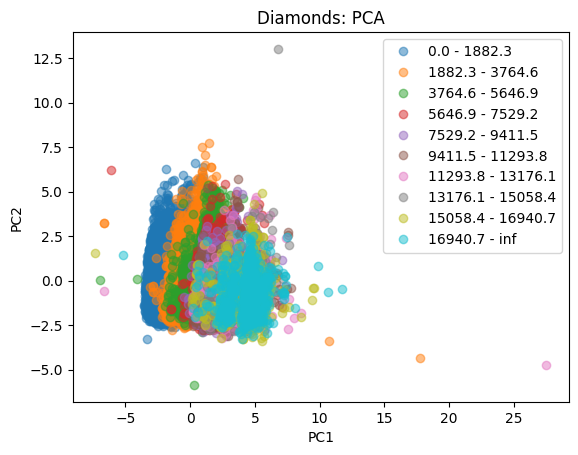

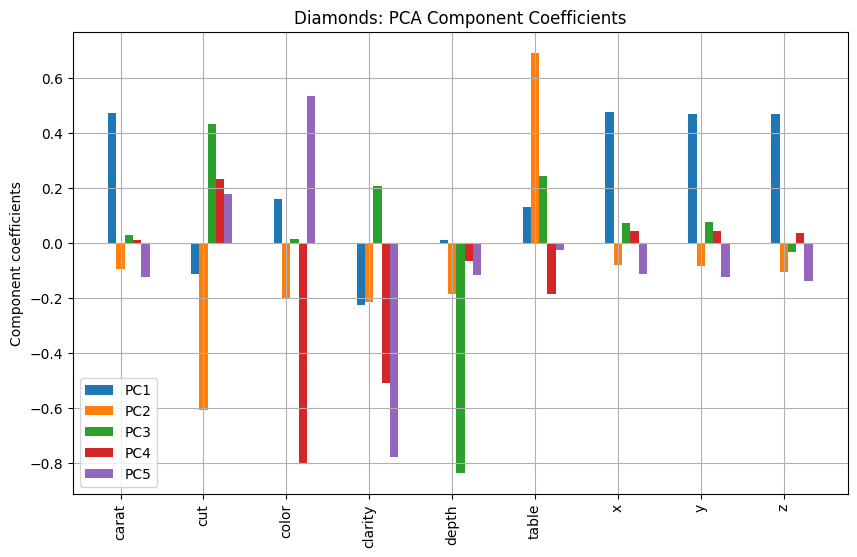

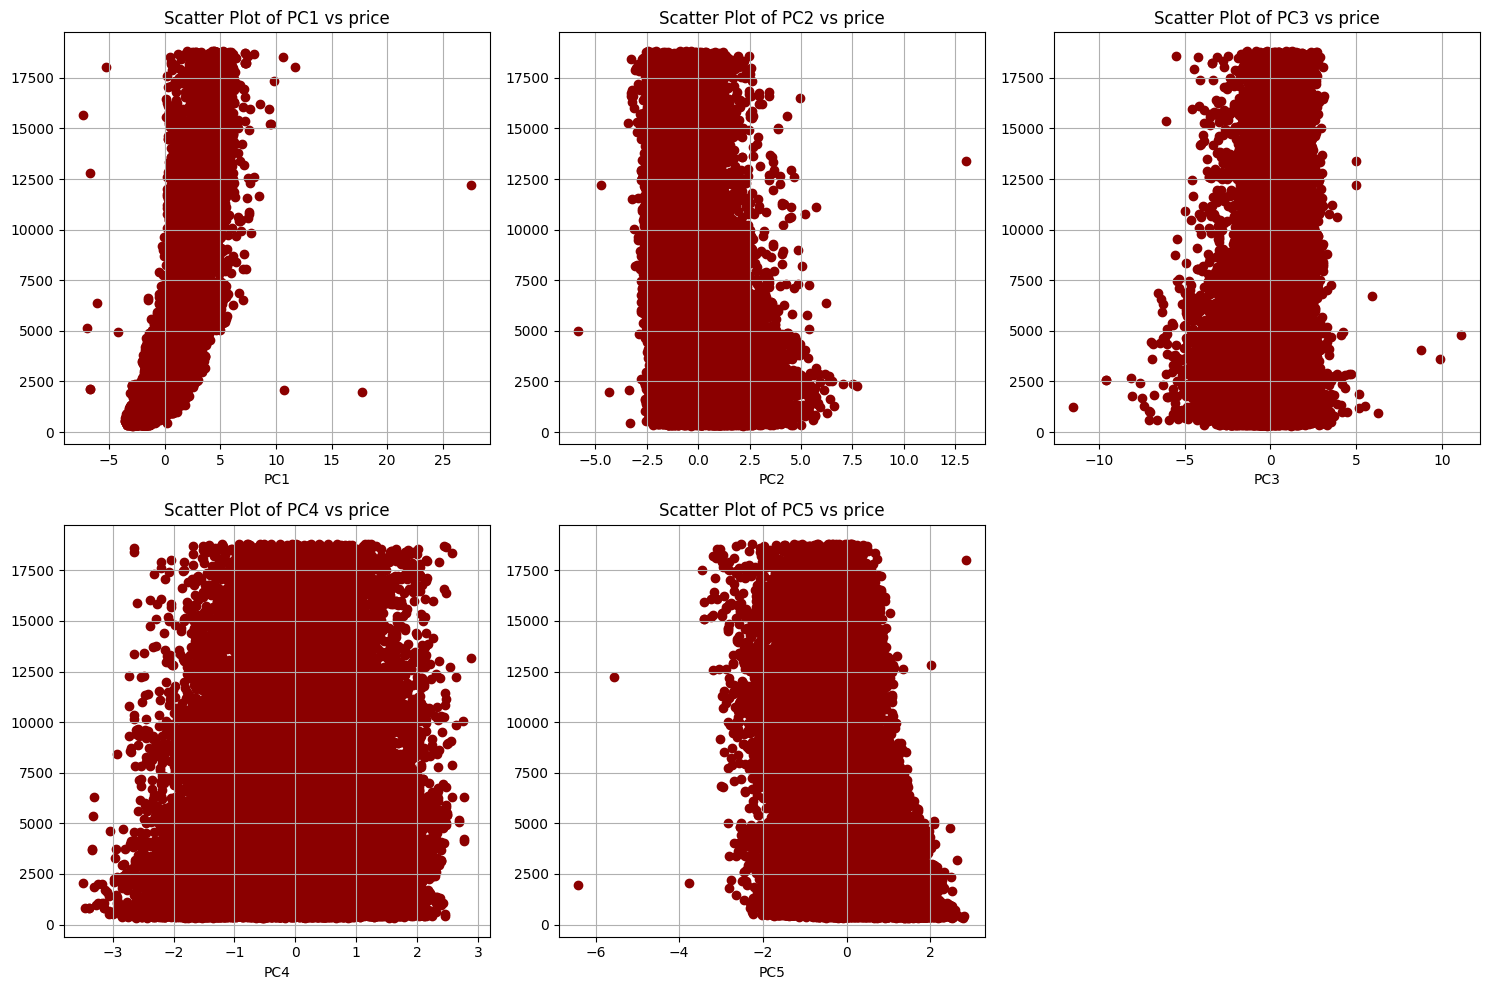

Count of each class price_category
0    23328
1    10257
2     7852
3     4176
4     2498
5     1831
6     1344
7     1028
8      883
9      743
Name: count, dtype: int64
Price intervals as classes:  ['0.0 - 1882.3', '1882.3 - 3764.6', '3764.6 - 5646.9', '5646.9 - 7529.2', '7529.2 - 9411.5', '9411.5 - 11293.8', '11293.8 - 13176.1', '13176.1 - 15058.4', '15058.4 - 16940.7', '16940.7 - inf']


In [2]:
#Importing X, class labels and class names from Project 1
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.classLabels
classNames = project1_Alona_Gauri_Valeria.classNames
print("Count of each class", y.value_counts())
print("Price intervals as classes: ", classNames)

Three methods:

baseline

logistic regression

KNN k-nearest neighbor classification, complexity controlling parameter k = 1, 2 . . .


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.dummy import DummyClassifier

import numpy as np
#Importing project 1 to retrieve X and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Baseline Model
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
baseline_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline Accuracy:", baseline_accuracy)


Baseline Accuracy: 0.4318687430478309


In [4]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

neighbors = [4,5,6,7,15]
k_gen_errors = {}


for k in neighbors:
    k_gen_errors[k] = []
    

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_accuracy = 1-knn.score(X_test, y_test)
        k_gen_errors[k].append(test_accuracy)


neighbor_error_list = [(k, sum(k_gen_errors[k]) / 10) for k in neighbors]

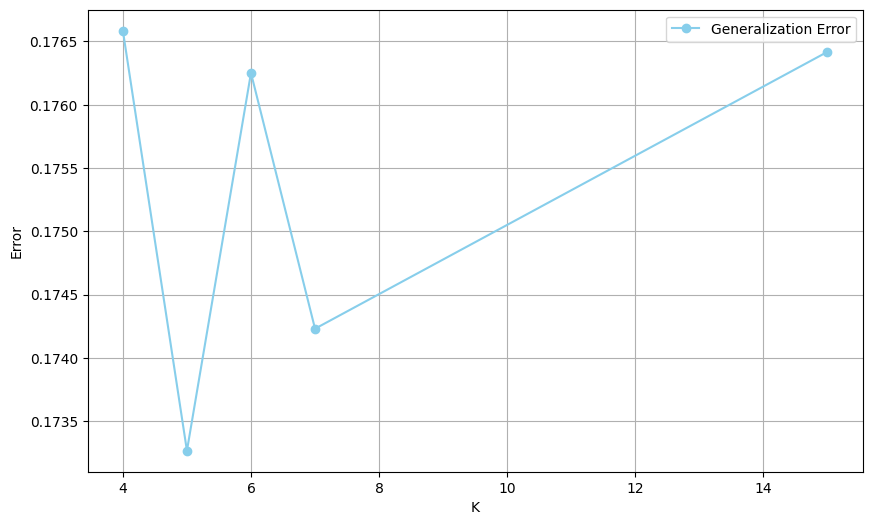

In [5]:
import matplotlib.pyplot as plt
k_values_plot, errors = zip(*neighbor_error_list)
_, 

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(k_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')


plt.xlabel('K')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
#1 layer Logistic with K_fold = 10, and many different lambdas
#1 layer Logistic with K_fold = 10, and many different lambdas

import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the values of lambda
lambda_values = [0.001, 0.01, 0.1, 10, 100,]

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Initialize an empty dictionary to store cross-validation results
lambda_results = {l: [] for l in lambda_values}

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for l in lambda_values:
        # Initialize logistic regression model with regularization parameter (lambda)
        logistic_model = LogisticRegression(C=1/l, max_iter=1000, solver='lbfgs', random_state=0)
        
        # Train the model
        logistic_model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = logistic_model.predict(X_test)
        
        # Calculate accuracy and store the result
        error = 1-accuracy_score(y_test, y_pred)
        lambda_results[l].append(error)

# Calculate mean accuracy for each lambda value
mean_error = {l: np.mean(err) for l, err in lambda_results.items()}

# Print mean accuracy for each lambda value
for l, err in mean_error.items():
    print(f"Lambda = {l}: Mean Error = {err:.4f}")

C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Lambda = 0.001: Mean Error = 0.2147
Lambda = 0.01: Mean Error = 0.2154
Lambda = 0.1: Mean Error = 0.2147
Lambda = 10: Mean Error = 0.2213
Lambda = 100: Mean Error = 0.2594


C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


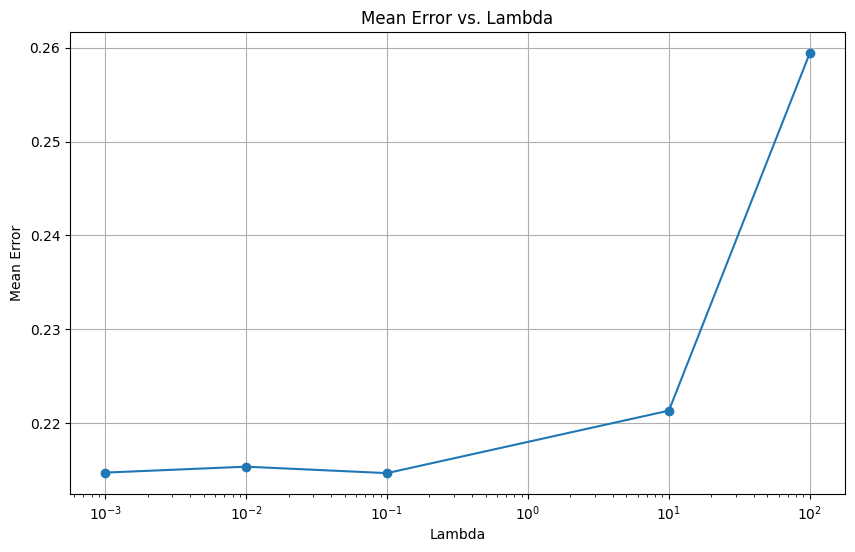

In [4]:
import matplotlib.pyplot as plt

# Extract lambda values and mean errors
lambda_values = list(mean_error.keys())
mean_errors = list(mean_error.values())

# Plot lambda values vs. mean errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, mean_errors, marker='o', linestyle='-')
plt.xlabel('Lambda')
plt.ylabel('Mean Error')
plt.title('Mean Error vs. Lambda')
plt.xscale('log')  # Set logarithmic scale for better visualization
plt.grid(True)
plt.show()

In [5]:
#2-fold cross validation
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Define the range of complexity-controlling parameters
lambda_values = [0.001, 0.01, 0.1, 1, 10] #put instead relevan ones
K_values =  [2, 4, 6, 5, 10]

K_outer=10
K_inner=10
# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=11)
k_outer = 0
rows = []

# Initialize lists to store predictions and true labels for statistical evaluation
all_y_true = []
all_y_pred_logistic = []
all_y_pred_knn = []
all_y_pred_baseline = []

lr_error_list=[]
knn_error_list=[]
baseline_error_list=[]

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]
    
    y_train_outer = y_train_outer.reset_index(drop=True)
    y_test_outer = y_test_outer.reset_index(drop=True)
    
    inner_scores_logistic = {lmbda: [] for lmbda in lambda_values} # Initialize dictionary to store errors for each lambda
    inner_scores_knn_fold = {k: [] for k in K_values}

    k_inner = 0
    # Inner cross-validation loop
    for train_inner_index, test_inner_index in inner_cv.split(X_train_outer):
        X_train_inner, X_test_inner = X[train_inner_index], X[test_inner_index]
        y_train_inner, y_test_inner = y[train_inner_index], y[test_inner_index]

        # Logistic Regression
        for lmbda in lambda_values:
            logistic_model = LogisticRegression(C=1/lmbda, max_iter=1000, solver='lbfgs', random_state=0)
            logistic_model.fit(X_train_inner, y_train_inner)
            y_pred_inner_logistic = logistic_model.predict(X_test_inner)
            inner_error_logistic = 1 - accuracy_score(y_test_inner, y_pred_inner_logistic)
            inner_scores_logistic[lmbda].append(inner_error_logistic)

        # KNN
        for k in K_values:
            knn_model = KNeighborsClassifier(n_neighbors=k)
            knn_model.fit(X_train_inner, y_train_inner)
            y_pred_inner_knn = knn_model.predict(X_test_inner)
            inner_error_knn = 1 - accuracy_score(y_test_inner, y_pred_inner_knn)
            inner_scores_knn_fold[k].append(inner_error_knn)
        
        k_inner += 1

    # Calculate mean error for each lambda value
    lambda_avg_errors = {lmbda: np.mean(errors) for lmbda, errors in inner_scores_logistic.items()}
    best_lambda = min(lambda_avg_errors, key=lambda lmbda: lambda_avg_errors[lmbda])

    # Calculate mean error for each k value
    k_avg_errors = {k: np.mean(errors) for k, errors in inner_scores_knn_fold.items()}
    best_k = min(k_avg_errors, key=lambda k: k_avg_errors[k])

    # Logistic Regression with best lambda
    logistic_model = LogisticRegression(C=1/best_lambda, max_iter=1000, solver='lbfgs', random_state=0)
    logistic_model.fit(X_train_outer, y_train_outer)
    y_pred_outer_logistic = logistic_model.predict(X_test_outer)

    # KNN with best k
    knn_model = KNeighborsClassifier(n_neighbors=best_k)
    knn_model.fit(X_train_outer, y_train_outer)
    y_pred_outer_knn = knn_model.predict(X_test_outer)

    # Baseline
    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(X_train_outer, y_train_outer)
    y_pred_baseline = dummy_clf.predict(X_test_outer)

    # Store predictions and true labels for statistical evaluation
    all_y_true.extend(y_test_outer)
    all_y_pred_logistic.extend(y_pred_outer_logistic)
    all_y_pred_knn.extend(y_pred_outer_knn)
    all_y_pred_baseline.extend(y_pred_baseline)

    # Calculate error for logistic regression
    logistic_error = 1 - accuracy_score(y_test_outer, y_pred_outer_logistic)
    lr_error_list.append(logistic_error)

    # Calculate error for KNN
    knn_error = 1 - accuracy_score(y_test_outer, y_pred_outer_knn)
    knn_error_list.append(knn_error)

    # Calculate error for baseline
    baseline_error = 1 - accuracy_score(y_test_outer, y_pred_baseline)
    baseline_error_list.append(baseline_error)

    rows.append({'k_outer': k_outer, 'lambda': best_lambda, 'best_k': best_k, 'logistic_error': logistic_error, 'knn_error': knn_error, 'baseline_error': baseline_error})
    k_outer += 1

two_layer_results = pd.DataFrame(rows)

# Calculate overall error for logistic regression
overall_logistic_error = 1 - accuracy_score(all_y_true, all_y_pred_logistic)

# Calculate overall error for KNN
overall_knn_error = 1 - accuracy_score(all_y_true, all_y_pred_knn)

# Calculate overall error for baseline
overall_baseline_error = 1 - accuracy_score(all_y_true, all_y_pred_baseline)

# Print overall 
print(two_layer_results) 
print("Overall Logistic Regression Error:", overall_logistic_error)
print("Overall KNN Error:", overall_knn_error)
print("Overall Baseline Error:", overall_baseline_error)

C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

   k_outer  lambda  best_k  logistic_error  knn_error  baseline_error
0        0     0.1       2        0.214164   0.249092        0.567075
1        1     0.1       2        0.214646   0.257990        0.567964
Overall Logistic Regression Error: 0.21440489432703003
Overall KNN Error: 0.25354097144975896
Overall Baseline Error: 0.5675194660734149


In [ ]:
import numpy as np
from scipy.stats import chi2, norm

# Define the desired confidence level
confidence_level = 0.95

# Calculate z-score corresponding to the confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Assuming you have collected errors for each model
logistic_errors = lr_error_list  # List of errors/misclassification rates for logistic regression
knn_errors = knn_error_list  # List of errors/misclassification rates for KNN
baseline_errors = baseline_error_list  # List of errors/misclassification rates for baseline

# Calculate McNemar's test statistics for logistic regression vs. KNN
logistic_knn_table = [[sum(np.logical_and(logistic_errors, knn_errors)), sum(np.logical_and(logistic_errors, np.logical_not(knn_errors)))],
                      [sum(np.logical_and(np.logical_not(logistic_errors), knn_errors)), sum(np.logical_and(np.logical_not(logistic_errors), np.logical_not(knn_errors)))]]

chi2_stat_lr_knn = (abs(logistic_knn_table[0][1] - logistic_knn_table[1][0]) - 1)**2 / (logistic_knn_table[0][1] + logistic_knn_table[1][0])
p_value_lr_knn = 1 - chi2.cdf(chi2_stat_lr_knn, 1)  # Degrees of freedom: 1

# Calculate McNemar's test statistics for logistic regression vs. baseline
logistic_baseline_table = [[sum(np.logical_and(logistic_errors, baseline_errors)), sum(np.logical_and(logistic_errors, np.logical_not(baseline_errors)))],
                           [sum(np.logical_and(np.logical_not(logistic_errors), baseline_errors)), sum(np.logical_and(np.logical_not(logistic_errors), np.logical_not(baseline_errors)))]]

chi2_stat_lr_baseline = (abs(logistic_baseline_table[0][1] - logistic_baseline_table[1][0]) - 1)**2 / (logistic_baseline_table[0][1] + logistic_baseline_table[1][0])
p_value_lr_baseline = 1 - chi2.cdf(chi2_stat_lr_baseline, 1)  # Degrees of freedom: 1

# Calculate McNemar's test statistics for KNN vs. baseline
knn_baseline_table = [[sum(np.logical_and(knn_errors, baseline_errors)), sum(np.logical_and(knn_errors, np.logical_not(baseline_errors)))],
                      [sum(np.logical_and(np.logical_not(knn_errors), baseline_errors)), sum(np.logical_and(np.logical_not(knn_errors), np.logical_not(baseline_errors)))]]

chi2_stat_knn_baseline = (abs(knn_baseline_table[0][1] - knn_baseline_table[1][0]) - 1)**2 / (knn_baseline_table[0][1] + knn_baseline_table[1][0])
p_value_knn_baseline = 1 - chi2.cdf(chi2_stat_knn_baseline, 1)  # Degrees of freedom: 1

# Calculate confidence intervals for the p-values
ci_lr_knn = (p_value_lr_knn - z_score * np.sqrt(p_value_lr_knn * (1 - p_value_lr_knn) / len(logistic_errors)),
             p_value_lr_knn + z_score * np.sqrt(p_value_lr_knn * (1 - p_value_lr_knn) / len(logistic_errors)))

ci_lr_baseline = (p_value_lr_baseline - z_score * np.sqrt(p_value_lr_baseline * (1 - p_value_lr_baseline) / len(logistic_errors)),
                  p_value_lr_baseline + z_score * np.sqrt(p_value_lr_baseline * (1 - p_value_lr_baseline) / len(logistic_errors)))

ci_knn_baseline = (p_value_knn_baseline - z_score * np.sqrt(p_value_knn_baseline * (1 - p_value_knn_baseline) / len(logistic_errors)),
                   p_value_knn_baseline + z_score * np.sqrt(p_value_knn_baseline * (1 - p_value_knn_baseline) / len(logistic_errors)))

# Print the results
print("McNemar's test results:")
print("Logistic Regression vs. KNN - Chi-square Statistic:", chi2_stat_lr_knn, "p-value:", p_value_lr_knn, "CI:", ci_lr_knn)
print("Logistic Regression vs. Baseline - Chi-square Statistic:", chi2_stat_lr_baseline, "p-value:", p_value_lr_baseline, "CI:", ci_lr_baseline)
print("KNN vs. Baseline - Chi-square Statistic:", chi2_stat_knn_baseline, "p-value:", p_value_knn_baseline, "CI:", ci_knn_baseline)


In [ ]:
#part 5: training a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your data stored in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a suitable value of lambda (or C)
lambda_value = 0.1  # I took this value because it showed least error while testing Logistic regression, however should take this from 2 fold if and when it runs 

# Train logistic regression model with Ridge regularization
logistic_model = LogisticRegression(C=1/lambda_value, solver='lbfgs', max_iter=1000, random_state=0)
logistic_model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = logistic_model.score(X_test_scaled, y_test)
print("Accuracy of logistic regression model with regularization:", accuracy)


KeyError: '[4, 25, 29, 37, 41, 52, 55, 57, 66, 84, 107, 167, 174, 185, 192, 203, 231, 241, 262, 281, 282, 307, 321, 329, 345, 355, 360, 367, 387, 406, 413, 429, 464, 470, 500, 504, 509, 537, 540, 556, 557, 560, 564, 570, 584, 589, 594, 597, 604, 634, 643, 651, 703, 707, 715, 724, 730, 766, 767, 771, 775, 781, 783, 788, 804, 807, 822, 826, 828, 845, 847, 850, 866, 891, 895, 906, 916, 922, 924, 927, 933, 934, 952, 955, 967, 970, 986, 992, 998, 1026, 1030, 1043, 1046, 1049, 1068, 1074, 1111, 1156, 1161, 1168, 1171, 1191, 1203, 1217, 1230, 1253, 1264, 1274, 1276, 1281, 1288, 1297, 1319, 1330, 1333, 1347, 1351, 1381, 1388, 1401, 1402, 1414, 1416, 1417, 1437, 1454, 1459, 1480, 1482, 1484, 1499, 1500, 1501, 1506, 1512, 1514, 1520, 1557, 1558, 1561, 1578, 1584, 1587, 1595, 1616, 1620, 1625, 1640, 1648, 1659, 1675, 1686, 1691, 1703, 1706, 1714, 1727, 1730, 1742, 1744, 1777, 1797, 1812, 1814, 1818, 1821, 1832, 1848, 1858, 1874, 1875, 1883, 1895, 1910, 1911, 1918, 1922, 1928, 1932, 1955, 1960, 1963, 1971, 1986, 1991, 2012, 2017, 2037, 2044, 2057, 2061, 2064, 2066, 2080, 2091, 2133, 2154, 2159, 2162, 2195, 2201, 2202, 2204, 2231, 2234, 2235, 2248, 2254, 2269, 2270, 2275, 2277, 2294, 2299, 2310, 2326, 2330, 2338, 2376, 2403, 2425, 2429, 2435, 2443, 2478, 2481, 2492, 2496, 2558, 2575, 2578, 2632, 2648, 2667, 2668, 2671, 2685, 2702, 2705, 2708, 2736, 2743, 2744, 2752, 2754, 2765, 2788, 2812, 2837, 2843, 2873, 2881, 2921, 2928, 2947, 2951, 2952, 2953, 2966, 2986, 2996, 3020, 3025, 3042, 3054, 3071, 3072, 3084, 3094, 3104, 3116, 3122, 3128, 3178, 3187, 3216, 3220, 3228, 3235, 3236, 3237, 3255, 3275, 3285, 3290, 3293, 3302, 3307, 3342, 3369, 3371, 3373, 3381, 3391, 3419, 3422, 3430, 3441, 3443, 3466, 3481, 3502, 3515, 3531, 3539, 3548, 3550, 3560, 3582, 3595, 3598, 3608, 3614, 3650, 3652, 3662, 3682, 3685, 3692, 3700, 3703, 3708, 3711, 3718, 3720, 3727, 3729, 3731, 3740, 3757, 3784, 3785, 3791, 3797, 3800, 3844, 3852, 3854, 3868, 3871, 3888, 3893, 3902, 3905, 3910, 3912, 3923, 3943, 3976, 3996, 3998, 4019, 4033, 4052, 4054, 4058, 4063, 4079, 4092, 4112, 4114, 4117, 4123, 4145, 4159, 4162, 4168, 4180, 4181, 4183, 4184, 4224, 4241, 4254, 4262, 4282, 4283, 4284, 4286, 4305, 4318, 4338, 4349, 4380, 4390, 4392, 4416, 4437, 4446, 4454, 4456, 4464, 4476, 4477, 4486, 4527, 4546, 4552, 4560, 4579, 4599, 4606, 4608, 4611, 4617, 4624, 4633, 4644, 4645, 4652, 4697, 4698, 4728, 4743, 4766, 4780, 4781, 4823, 4835, 4838, 4841, 4845, 4863, 4864, 4892, 4900, 4904, 4907, 4929, 4939, 4942, 4997, 5002, 5016, 5021, 5029, 5041, 5043, 5052, 5053, 5073, 5076, 5081, 5084, 5094, 5100, 5115, 5117, 5119, 5130, 5134, 5138, 5148, 5155, 5156, 5157, 5174, 5185, 5202, 5230, 5240, 5245, 5251, 5259, 5270, 5271, 5282, 5294, 5303, 5317, 5372, 5379, 5384, 5392, 5402, 5434, 5442, 5444, 5468, 5470, 5476, 5484, 5489, 5495, 5500, 5503, 5515, 5520, 5534, 5549, 5579, 5583, 5591, 5592, 5596, 5606, 5635, 5644, 5686, 5704, 5708, 5709, 5720, 5721, 5761, 5776, 5808, 5816, 5823, 5829, 5868, 5894, 5896, 5898, 5899, 5903, 5905, 5933, 5950, 5961, 5966, 5969, 5979, 5980, 5982, 5988, 5989, 5995, 5998, 6000, 6003, 6018, 6022, 6029, 6055, 6076, 6077, 6082, 6087, 6093, 6104, 6112, 6115, 6122, 6124, 6141, 6158, 6174, 6178, 6186, 6205, 6206, 6219, 6224, 6254, 6262, 6266, 6290, 6291, 6321, 6334, 6339, 6362, 6369, 6372, 6374, 6382, 6383, 6389, 6393, 6394, 6402, 6403, 6412, 6450, 6461, 6465, 6485, 6490, 6506, 6510, 6513, 6526, 6533, 6543, 6546, 6549, 6551, 6553, 6554, 6557, 6564, 6569, 6572, 6577, 6597, 6600, 6640, 6649, 6683, 6684, 6688, 6694, 6698, 6719, 6738, 6771, 6778, 6781, 6787, 6802, 6824, 6843, 6856, 6865, 6877, 6891, 6895, 6906, 6909, 6916, 6918, 6930, 6939, 6948, 6952, 6953, 6960, 6968, 6993, 7026, 7038, 7041, 7065, 7075, 7086, 7102, 7105, 7116, 7118, 7122, 7126, 7139, 7181, 7190, 7234, 7235, 7239, 7251, 7253, 7270, 7280, 7282, 7317, 7323, 7330, 7349, 7355, 7368, 7401, 7466, 7474, 7485, 7521, 7523, 7526, 7527, 7529, 7539, 7543, 7549, 7553, 7559, 7572, 7592, 7610, 7611, 7614, 7622, 7624, 7628, 7629, 7630, 7635, 7656, 7659, 7664, 7690, 7692, 7723, 7730, 7738, 7746, 7764, 7812, 7816, 7825, 7842, 7845, 7862, 7889, 7919, 7922, 7943, 7954, 7959, 7970, 7978, 8019, 8020, 8029, 8042, 8043, 8058, 8059, 8080, 8091, 8105, 8125, 8133, 8147, 8149, 8152, 8154, 8166, 8183, 8187, 8198, 8222, 8230, 8254, 8260, 8267, 8312, 8329, 8338, 8339, 8355, 8364, 8366, 8377, 8382, 8404, 8418, 8423, 8438, 8453, 8461, 8463, 8470, 8490, 8492, 8498, 8517, 8518, 8537, 8548, 8556, 8566, 8578, 8581, 8584, 8589, 8604, 8621, 8623, 8628, 8630, 8656, 8657, 8677, 8680, 8683, 8686, 8691, 8700, 8708, 8713, 8716, 8722, 8736, 8780, 8785, 8798, 8807, 8815, 8846, 8855, 8856, 8860, 8866, 8875, 8901, 8925, 8934, 8936, 8938, 8956, 8963, 8972, 8984, 9002, 9007, 9008, 9009, 9020, 9039, 9050, 9069, 9089, 9117, 9123, 9132, 9140, 9141, 9142, 9153, 9156, 9184, 9188, 9213, 9216, 9218, 9222, 9228, 9229, 9236, 9257, 9265, 9266, 9282, 9303, 9314, 9320, 9336, 9350, 9383, 9403, 9406, 9409, 9435, 9446, 9448, 9466, 9494, 9515, 9537, 9539, 9543, 9544, 9556, 9558, 9561, 9562, 9571, 9581, 9593, 9611, 9620, 9631, 9644, 9668, 9672, 9711, 9728, 9730, 9735, 9745, 9749, 9750, 9752, 9761, 9768, 9769, 9785, 9794, 9801, 9802, 9810, 9814, 9841, 9851, 9853, 9857, 9861, 9872, 9883, 9887, 9893, 9895, 9922, 9935, 9939, 9946, 9947, 9959, 9966, 9974, 9979, 9994, 10013, 10023, 10040, 10050, 10052, 10057, 10074, 10081, 10096, 10104, 10112, 10117, 10136, 10141, 10144, 10155, 10160, 10164, 10174, 10176, 10181, 10186, 10192, 10204, 10218, 10223, 10227, 10233, 10265, 10268, 10294, 10305, 10324, 10328, 10329, 10333, 10338, 10339, 10345, 10349, 10358, 10366, 10389, 10395, 10402, 10416, 10440, 10445, 10454, 10460, 10463, 10467, 10474, 10476, 10495, 10496, 10508, 10516, 10519, 10530, 10540, 10544, 10557, 10560, 10563, 10586, 10602, 10607, 10608, 10618, 10629, 10642, 10648, 10660, 10666, 10670, 10691, 10692, 10708, 10722, 10737, 10749, 10750, 10766, 10768, 10776, 10788, 10792, 10794, 10816, 10822, 10834, 10849, 10860, 10884, 10892, 10900, 10910, 10931, 10937, 10945, 10955, 10970, 10979, 10991, 10994, 10997, 11002, 11016, 11103, 11130, 11150, 11181, 11200, 11207, 11209, 11226, 11229, 11233, 11242, 11252, 11260, 11261, 11294, 11301, 11304, 11337, 11343, 11368, 11369, 11370, 11372, 11380, 11385, 11394, 11395, 11408, 11418, 11422, 11432, 11448, 11460, 11461, 11462, 11466, 11467, 11487, 11490, 11492, 11508, 11520, 11560, 11576, 11584, 11597, 11613, 11630, 11634, 11657, 11679, 11694, 11699, 11710, 11716, 11739, 11762, 11768, 11777, 11782, 11805, 11808, 11821, 11824, 11838, 11847, 11852, 11862, 11873, 11891, 11898, 11906, 11913, 11916, 11924, 11942, 11943, 11961, 11972, 11975, 11979, 11995, 12018, 12024, 12040, 12042, 12043, 12046, 12052, 12055, 12060, 12061, 12068, 12099, 12102, 12119, 12125, 12155, 12159, 12168, 12186, 12187, 12188, 12232, 12249, 12257, 12263, 12267, 12300, 12301, 12341, 12354, 12356, 12382, 12396, 12402, 12403, 12406, 12410, 12418, 12420, 12426, 12466, 12467, 12470, 12473, 12479, 12510, 12516, 12518, 12528, 12537, 12545, 12560, 12575, 12603, 12611, 12613, 12616, 12647, 12721, 12722, 12733, 12746, 12751, 12752, 12769, 12773, 12782, 12803, 12807, 12814, 12825, 12828, 12829, 12848, 12850, 12862, 12864, 12867, 12880, 12888, 12889, 12899, 12905, 12918, 12934, 12935, 12940, 12942, 12948, 12958, 12962, 12964, 12966, 12970, 12982, 12983, 12990, 12998, 13004, 13011, 13013, 13066, 13078, 13083, 13084, 13089, 13116, 13118, 13125, 13131, 13140, 13142, 13146, 13151, 13162, 13167, 13185, 13189, 13197, 13206, 13216, 13245, 13248, 13252, 13257, 13260, 13271, 13274, 13289, 13295, 13301, 13313, 13315, 13332, 13349, 13371, 13372, 13380, 13410, 13412, 13437, 13439, 13446, 13448, 13472, 13484, 13491, 13497, 13501, 13502, 13505, 13518, 13558, 13598, 13602, 13618, 13624, 13626, 13627, 13634, 13636, 13640, 13654, 13681, 13698, 13709, 13728, 13748, 13750, 13764, 13789, 13793, 13794, 13796, 13817, 13818, 13826, 13860, 13864, 13882, 13884, 13888, 13892, 13910, 13911, 13912, 13918, 13925, 13940, 13942, 13943, 13948, 13950, 13957, 13971, 14002, 14012, 14025, 14055, 14056, 14058, 14083, 14094, 14099, 14125, 14128, 14129, 14137, 14161, 14181, 14183, 14193, 14203, 14207, 14254, 14272, 14275, 14283, 14288, 14319, 14329, 14341, 14342, 14344, 14346, 14363, 14370, 14430, 14432, 14447, 14449, 14452, 14489, 14490, 14493, 14494, 14510, 14513, 14559, 14573, 14574, 14576, 14611, 14614, 14620, 14621, 14641, 14658, 14662, 14665, 14678, 14692, 14696, 14698, 14709, 14715, 14732, 14743, 14753, 14775, 14784, 14803, 14804, 14809, 14824, 14828, 14831, 14839, 14846, 14850, 14855, 14879, 14897, 14907, 14931, 14938, 14939, 14952, 14962, 14967, 15005, 15006, 15009, 15010, 15042, 15050, 15068, 15080, 15088, 15091, 15112, 15126, 15129, 15137, 15155, 15156, 15160, 15162, 15187, 15190, 15231, 15232, 15240, 15249, 15250, 15267, 15317, 15318, 15331, 15343, 15351, 15354, 15390, 15411, 15413, 15424, 15482, 15484, 15498, 15507, 15515, 15516, 15517, 15521, 15539, 15557, 15558, 15574, 15580, 15602, 15610, 15624, 15626, 15627, 15628, 15629, 15631, 15661, 15681, 15698, 15705, 15715, 15719, 15727, 15736, 15740, 15759, 15760, 15764, 15780, 15794, 15817, 15825, 15845, 15846, 15855, 15863, 15866, 15868, 15872, 15875, 15878, 15932, 15938, 15947, 15956, 15973, 15992, 16007, 16014, 16029, 16030, 16034, 16065, 16068, 16109, 16110, 16113, 16117, 16124, 16149, 16155, 16156, 16157, 16163, 16174, 16182, 16183, 16214, 16222, 16229, 16260, 16287, 16293, 16307, 16310, 16318, 16333, 16336, 16344, 16364, 16373, 16384, 16390, 16399, 16402, 16418, 16436, 16440, 16451, 16471, 16492, 16493, 16508, 16526, 16528, 16536, 16538, 16545, 16555, 16561, 16590, 16594, 16595, 16601, 16630, 16652, 16657, 16662, 16701, 16718, 16745, 16763, 16794, 16806, 16807, 16827, 16842, 16849, 16862, 16889, 16891, 16894, 16896, 16917, 16925, 16936, 16958, 16978, 16979, 16986, 16993, 17006, 17012, 17023, 17044, 17067, 17070, 17082, 17085, 17086, 17103, 17106, 17121, 17137, 17163, 17165, 17168, 17169, 17177, 17180, 17184, 17188, 17226, 17231, 17234, 17240, 17247, 17262, 17266, 17284, 17293, 17294, 17306, 17310, 17323, 17335, 17346, 17358, 17361, 17401, 17402, 17406, 17422, 17448, 17460, 17467, 17478, 17482, 17486, 17495, 17506, 17550, 17564, 17595, 17608, 17611, 17622, 17627, 17640, 17656, 17720, 17722, 17741, 17743, 17746, 17747, 17764, 17771, 17773, 17797, 17803, 17837, 17839, 17852, 17853, 17857, 17866, 17882, 17895, 17899, 17909, 17926, 17960, 17972, 17993, 18010, 18022, 18024, 18041, 18056, 18059, 18141, 18150, 18154, 18168, 18174, 18175, 18198, 18216, 18218, 18224, 18230, 18231, 18233, 18241, 18245, 18257, 18258, 18260, 18286, 18324, 18326, 18329, 18340, 18347, 18355, 18365, 18379, 18380, 18401, 18402, 18406, 18417, 18420, 18428, 18442, 18444, 18454, 18488, 18508, 18510, 18527, 18532, 18540, 18541, 18549, 18558, 18576, 18586, 18588, 18594, 18595, 18605, 18607, 18625, 18627, 18632, 18639, 18645, 18646, 18667, 18673, 18695, 18714, 18721, 18736, 18742, 18746, 18750, 18759, 18763, 18777, 18782, 18787, 18804, 18807, 18825, 18832, 18836, 18840, 18843, 18861, 18865, 18870, 18875, 18876, 18882, 18884, 18889, 18895, 18914, 18917, 18932, 18933, 18940, 18941, 18960, 18973, 18990, 18993, 19043, 19059, 19079, 19118, 19119, 19123, 19138, 19160, 19195, 19199, 19204, 19223, 19224, 19225, 19230, 19238, 19256, 19269, 19282, 19313, 19314, 19325, 19345, 19347, 19354, 19357, 19374, 19376, 19394, 19410, 19427, 19443, 19483, 19496, 19498, 19504, 19528, 19529, 19536, 19543, 19553, 19572, 19577, 19585, 19599, 19601, 19602, 19615, 19622, 19638, 19654, 19685, 19687, 19714, 19743, 19752, 19775, 19796, 19808, 19817, 19824, 19832, 19855, 19875, 19877, 19896, 19897, 19921, 19922, 19959, 19964, 19973, 19988, 20013, 20031, 20042, 20057, 20073, 20082, 20107, 20119, 20122, 20124, 20126, 20129, 20135, 20167, 20178, 20180, 20186, 20187, 20197, 20200, 20205, 20212, 20213, 20228, 20236, 20253, 20262, 20264, 20271, 20278, 20281, 20284, 20286, 20292, 20297, 20313, 20329, 20332, 20334, 20359, 20361, 20374, 20379, 20392, 20403, 20406, 20411, 20425, 20427, 20429, 20444, 20449, 20451, 20453, 20456, 20477, 20503, 20508, 20554, 20558, 20579, 20585, 20592, 20609, 20633, 20653, 20657, 20660, 20669, 20677, 20681, 20699, 20712, 20721, 20729, 20746, 20759, 20786, 20797, 20802, 20807, 20817, 20832, 20836, 20865, 20866, 20867, 20889, 20896, 20937, 20944, 20947, 20969, 20984, 20985, 20994, 21006, 21036, 21042, 21046, 21047, 21055, 21062, 21089, 21146, 21147, 21160, 21164, 21166, 21171, 21177, 21189, 21206, 21213, 21220, 21221, 21227, 21232, 21237, 21247, 21286, 21297, 21342, 21344, 21362, 21369, 21380, 21382, 21393, 21401, 21406, 21421, 21428, 21449, 21497, 21524, 21543, 21550, 21553, 21557, 21559, 21575, 21594, 21602, 21607, 21614, 21686, 21695, 21696, 21712, 21719, 21723, 21730, 21733, 21765, 21784, 21830, 21845, 21851, 21854, 21865, 21870, 21874, 21887, 21890, 21893, 21905, 21910, 21912, 21920, 21926, 21940, 21956, 21973, 21974, 21996, 22006, 22011, 22024, 22039, 22043, 22066, 22072, 22081, 22084, 22087, 22092, 22108, 22123, 22125, 22129, 22145, 22147, 22149, 22156, 22157, 22158, 22187, 22190, 22212, 22219, 22220, 22223, 22233, 22234, 22243, 22252, 22265, 22273, 22285, 22291, 22329, 22337, 22342, 22350, 22359, 22364, 22378, 22394, 22410, 22477, 22510, 22524, 22533, 22540, 22561, 22564, 22597, 22602, 22608, 22625, 22643, 22684, 22690, 22711, 22716, 22745, 22823, 22841, 22846, 22847, 22849, 22860, 22862, 22863, 22872, 22879, 22900, 22906, 22919, 22924, 22927, 22932, 22936, 22938, 22939, 22940, 22958, 22994, 22995, 23006, 23007, 23046, 23047, 23051, 23064, 23065, 23070, 23073, 23111, 23120, 23130, 23141, 23146, 23147, 23162, 23168, 23170, 23176, 23184, 23185, 23186, 23204, 23220, 23224, 23240, 23252, 23258, 23261, 23266, 23277, 23281, 23291, 23299, 23300, 23312, 23313, 23314, 23317, 23319, 23322, 23342, 23369, 23373, 23383, 23390, 23393, 23398, 23419, 23429, 23436, 23437, 23447, 23481, 23486, 23488, 23519, 23547, 23551, 23558, 23581, 23620, 23623, 23655, 23676, 23677, 23680, 23708, 23710, 23753, 23760, 23762, 23768, 23769, 23778, 23782, 23789, 23803, 23825, 23840, 23864, 23873, 23911, 23916, 23943, 23953, 23965, 23966, 23973, 23989, 23993, 23995, 23999, 24017, 24053, 24056, 24061, 24084, 24087, 24096, 24101, 24124, 24126, 24142, 24151, 24155, 24160, 24176, 24184, 24189, 24190, 24194, 24223, 24224, 24233, 24245, 24272, 24280, 24288, 24295, 24314, 24322, 24335, 24343, 24349, 24392, 24410, 24415, 24429, 24430, 24441, 24445, 24451, 24457, 24459, 24464, 24481, 24488, 24493, 24498, 24519, 24528, 24535, 24536, 24566, 24578, 24582, 24609, 24616, 24624, 24627, 24628, 24635, 24636, 24637, 24640, 24654, 24655, 24656, 24664, 24684, 24688, 24697, 24707, 24708, 24713, 24728, 24738, 24747, 24759, 24782, 24796, 24811, 24815, 24832, 24839, 24851, 24852, 24875, 24893, 24913, 24923, 24926, 24944, 24957, 24958, 24959, 24986, 24987, 24990, 24993, 24999, 25006, 25007, 25008, 25020, 25024, 25044, 25050, 25052, 25082, 25088, 25122, 25134, 25135, 25145, 25163, 25166, 25172, 25178, 25187, 25189, 25190, 25249, 25251, 25253, 25257, 25262, 25270, 25321, 25322, 25334, 25354, 25366, 25368, 25376, 25379, 25390, 25395, 25408, 25417, 25421, 25435, 25436, 25438, 25442, 25473, 25485, 25496, 25499, 25543, 25545, 25555, 25558, 25562, 25591, 25610, 25618, 25619, 25647, 25654, 25656, 25663, 25685, 25701, 25703, 25705, 25714, 25715, 25728, 25729, 25731, 25745, 25747, 25756, 25757, 25759, 25760, 25761, 25776, 25784, 25804, 25813, 25816, 25824, 25839, 25861, 25868, 25875, 25879, 25910, 25913, 25925, 25963, 25964, 25975, 25980, 25990, 25999, 26015, 26025, 26028, 26035, 26065, 26069, 26073, 26075, 26100, 26104, 26108, 26109, 26117, 26119, 26128, 26136, 26137, 26140, 26143, 26149, 26159, 26167, 26174, 26181, 26200, 26202, 26211, 26263, 26277, 26278, 26279, 26289, 26294, 26325, 26349, 26365, 26373, 26398, 26401, 26415, 26416, 26425, 26431, 26450, 26455, 26460, 26467, 26473, 26482, 26487, 26496, 26513, 26520, 26526, 26531, 26538, 26541, 26543, 26548, 26561, 26580, 26589, 26604, 26625, 26636, 26642, 26655, 26692, 26708, 26709, 26727, 26738, 26746, 26758, 26770, 26783, 26796, 26805, 26826, 26861, 26878, 26882, 26888, 26898, 26900, 26903, 26939, 26971, 26974, 27003, 27008, 27041, 27042, 27048, 27050, 27052, 27071, 27073, 27079, 27086, 27090, 27091, 27103, 27110, 27111, 27143, 27147, 27153, 27157, 27160, 27189, 27190, 27194, 27206, 27212, 27236, 27240, 27244, 27248, 27249, 27256, 27270, 27280, 27287, 27297, 27304, 27312, 27333, 27361, 27365, 27395, 27415, 27429, 27479, 27488, 27501, 27552, 27562, 27567, 27579, 27587, 27607, 27610, 27611, 27615, 27690, 27711, 27724, 27740, 27756, 27782, 27791, 27795, 27809, 27814, 27821, 27823, 27828, 27836, 27844, 27847, 27848, 27857, 27887, 27895, 27904, 27905, 27918, 27934, 27951, 27956, 27980, 27982, 27983, 27988, 28004, 28005, 28028, 28029, 28039, 28063, 28066, 28068, 28093, 28094, 28100, 28111, 28136, 28144, 28147, 28174, 28175, 28193, 28198, 28199, 28200, 28239, 28265, 28274, 28289, 28290, 28319, 28333, 28364, 28368, 28371, 28375, 28377, 28379, 28384, 28402, 28409, 28421, 28436, 28440, 28447, 28451, 28462, 28470, 28475, 28481, 28507, 28511, 28512, 28528, 28552, 28561, 28562, 28591, 28592, 28601, 28644, 28660, 28663, 28669, 28677, 28683, 28684, 28689, 28701, 28706, 28707, 28713, 28722, 28725, 28749, 28755, 28792, 28832, 28845, 28870, 28876, 28893, 28905, 28921, 28944, 28966, 28969, 28971, 28980, 28991, 28992, 29002, 29003, 29012, 29077, 29090, 29105, 29109, 29114, 29120, 29121, 29145, 29165, 29181, 29184, 29188, 29192, 29206, 29214, 29237, 29249, 29259, 29277, 29278, 29300, 29307, 29310, 29317, 29336, 29345, 29347, 29360, 29370, 29379, 29389, 29421, 29424, 29454, 29456, 29460, 29461, 29466, 29482, 29483, 29503, 29510, 29537, 29557, 29560, 29582, 29584, 29613, 29621, 29622, 29625, 29635, 29640, 29690, 29695, 29719, 29722, 29724, 29728, 29729, 29741, 29746, 29754, 29775, 29795, 29815, 29818, 29832, 29903, 29923, 29924, 29933, 29935, 29962, 29969, 29972, 29977, 29980, 29991, 30005, 30009, 30013, 30029, 30038, 30059, 30063, 30072, 30079, 30086, 30090, 30114, 30132, 30144, 30146, 30158, 30176, 30194, 30204, 30237, 30238, 30243, 30329, 30337, 30344, 30352, 30368, 30369, 30383, 30398, 30412, 30414, 30422, 30443, 30458, 30460, 30474, 30477, 30480, 30483, 30502, 30528, 30549, 30614, 30682, 30689, 30701, 30705, 30708, 30712, 30725, 30726, 30728, 30750, 30764, 30766, 30767, 30781, 30802, 30827, 30841, 30849, 30855, 30856, 30863, 30875, 30880, 30890, 30896, 30904, 30906, 30933, 30942, 30943, 30952, 30958, 30976, 30978, 31007, 31064, 31065, 31074, 31080, 31082, 31104, 31118, 31154, 31171, 31176, 31200, 31203, 31207, 31221, 31231, 31275, 31285, 31286, 31297, 31315, 31317, 31320, 31321, 31336, 31345, 31355, 31371, 31393, 31413, 31432, 31436, 31437, 31446, 31472, 31480, 31488, 31497, 31504, 31509, 31515, 31534, 31541, 31542, 31557, 31562, 31569, 31572, 31578, 31581, 31598, 31603, 31608, 31610, 31637, 31659, 31692, 31696, 31706, 31719, 31723, 31728, 31742, 31758, 31770, 31811, 31820, 31832, 31838, 31856, 31866, 31878, 31887, 31901, 31906, 31909, 31912, 31913, 31929, 31948, 31954, 31957, 31968, 31979, 31980, 31988, 32002, 32019, 32026, 32031, 32036, 32041, 32053, 32063, 32073, 32091, 32097, 32099, 32112, 32115, 32128, 32130, 32137, 32151, 32156, 32160, 32182, 32184, 32185, 32191, 32208, 32210, 32220, 32223, 32225, 32230, 32237, 32242, 32262, 32273, 32284, 32298, 32307, 32344, 32375, 32377, 32432, 32458, 32480, 32485, 32491, 32496, 32497, 32498, 32504, 32512, 32513, 32530, 32533, 32549, 32562, 32603, 32606, 32609, 32617, 32634, 32637, 32658, 32663, 32667, 32668, 32696, 32707, 32720, 32726, 32736, 32740, 32742, 32744, 32764, 32768, 32771, 32772, 32844, 32862, 32871, 32872, 32873, 32877, 32890, 32900, 32940, 32946, 32963, 32978, 32985, 32989, 32992, 32994, 32995, 33037, 33055, 33057, 33079, 33084, 33096, 33131, 33150, 33152, 33157, 33167, 33179, 33188, 33193, 33236, 33242, 33258, 33261, 33262, 33278, 33281, 33287, 33295, 33302, 33313, 33323, 33327, 33335, 33346, 33357, 33372, 33389, 33390, 33406, 33411, 33416, 33418, 33421, 33434, 33435, 33439, 33449, 33456, 33464, 33465, 33485, 33494, 33509, 33517, 33519, 33524, 33539, 33542, 33564, 33575, 33590, 33607, 33609, 33612, 33625, 33649, 33662, 33679, 33699, 33700, 33705, 33713, 33724, 33733, 33747, 33769, 33771, 33775, 33801, 33816, 33823, 33826, 33835, 33853, 33858, 33860, 33861, 33891, 33906, 33911, 33917, 33932, 33933, 33947, 33948, 33965, 33978, 33985, 33994, 33995, 34022, 34035, 34037, 34038, 34046, 34049, 34056, 34073, 34081, 34098, 34111, 34134, 34139, 34156, 34159, 34163, 34172, 34183, 34194, 34196, 34203, 34222, 34228, 34230, 34231, 34233, 34258, 34262, 34263, 34266, 34269, 34287, 34288, 34294, 34340, 34345, 34355, 34361, 34371, 34373, 34379, 34387, 34391, 34393, 34395, 34416, 34444, 34445, 34450, 34454, 34455, 34493, 34503, 34525, 34538, 34548, 34552, 34556, 34558, 34559, 34565, 34576, 34581, 34591, 34592, 34600, 34601, 34610, 34615, 34621, 34637, 34646, 34651, 34675, 34680, 34699, 34711, 34730, 34732, 34737, 34750, 34752, 34781, 34791, 34794, 34801, 34811, 34813, 34820, 34839, 34846, 34859, 34868, 34876, 34879, 34887, 34889, 34891, 34908, 34925, 34937, 34948, 34958, 34960, 34962, 34965, 34974, 34979, 34981, 34997, 35010, 35011, 35019, 35029, 35030, 35034, 35039, 35047, 35062, 35063, 35067, 35075, 35076, 35079, 35092, 35098, 35106, 35116, 35127, 35146, 35157, 35174, 35180, 35181, 35184, 35210, 35221, 35223, 35231, 35234, 35237, 35253, 35256, 35258, 35275, 35297, 35302, 35305, 35341, 35344, 35345, 35366, 35373, 35404, 35406, 35432, 35446, 35470, 35476, 35479, 35485, 35486, 35499, 35500, 35516, 35517, 35523, 35544, 35563, 35566, 35571, 35577, 35601, 35602, 35619, 35643, 35652, 35659, 35678, 35701, 35725, 35733, 35738, 35740, 35742, 35744, 35760, 35763, 35771, 35780, 35810, 35820, 35825, 35853, 35861, 35876, 35900, 35907, 35930, 35931, 35949, 35960, 35968, 35984, 35987, 35989, 35990, 35994, 36008, 36029, 36038, 36039, 36064, 36071, 36077, 36104, 36122, 36130, 36133, 36139, 36154, 36164, 36172, 36176, 36191, 36224, 36226, 36276, 36277, 36307, 36315, 36356, 36364, 36388, 36402, 36409, 36415, 36430, 36441, 36454, 36461, 36466, 36491, 36497, 36510, 36520, 36526, 36548, 36550, 36556, 36562, 36564, 36565, 36570, 36574, 36579, 36606, 36621, 36632, 36649, 36676, 36685, 36690, 36697, 36702, 36708, 36724, 36732, 36741, 36743, 36751, 36762, 36775, 36789, 36795, 36803, 36807, 36819, 36828, 36836, 36855, 36889, 36904, 36906, 36920, 36951, 36954, 36967, 36976, 36988, 36991, 36994, 37006, 37013, 37024, 37027, 37060, 37061, 37069, 37085, 37107, 37110, 37154, 37184, 37189, 37198, 37207, 37208, 37232, 37235, 37236, 37240, 37252, 37273, 37291, 37337, 37357, 37358, 37374, 37376, 37380, 37392, 37397, 37426, 37468, 37482, 37509, 37525, 37534, 37545, 37556, 37564, 37574, 37576, 37580, 37589, 37623, 37637, 37638, 37650, 37653, 37671, 37680, 37681, 37698, 37706, 37726, 37735, 37738, 37741, 37749, 37774, 37789, 37795, 37801, 37812, 37814, 37838, 37853, 37855, 37858, 37874, 37877, 37886, 37922, 37929, 37941, 37947, 37982, 38030, 38045, 38054, 38060, 38065, 38068, 38081, 38090, 38093, 38097, 38119, 38128, 38140, 38147, 38153, 38157, 38171, 38172, 38178, 38181, 38185, 38196, 38208, 38209, 38210, 38244, 38261, 38272, 38285, 38306, 38315, 38323, 38326, 38341, 38372, 38391, 38408, 38422, 38425, 38437, 38448, 38461, 38462, 38472, 38477, 38483, 38490, 38494, 38498, 38499, 38503, 38506, 38513, 38533, 38550, 38564, 38590, 38599, 38617, 38642, 38687, 38704, 38738, 38747, 38770, 38789, 38800, 38801, 38810, 38837, 38843, 38851, 38856, 38860, 38879, 38886, 38910, 38913, 38919, 38925, 38937, 38941, 38944, 38952, 38975, 39015, 39019, 39038, 39040, 39050, 39054, 39063, 39081, 39084, 39114, 39119, 39123, 39125, 39145, 39166, 39180, 39197, 39201, 39239, 39298, 39308, 39311, 39312, 39326, 39333, 39336, 39342, 39360, 39361, 39373, 39388, 39392, 39401, 39414, 39416, 39418, 39427, 39439, 39453, 39456, 39457, 39461, 39539, 39544, 39556, 39557, 39558, 39565, 39566, 39574, 39586, 39588, 39595, 39597, 39620, 39646, 39660, 39670, 39675, 39687, 39689, 39730, 39750, 39765, 39789, 39792, 39802, 39805, 39826, 39836, 39852, 39865, 39878, 39889, 39891, 39893, 39911, 39935, 39939, 39941, 39954, 39977, 39997, 39999, 40003, 40014, 40025, 40033, 40055, 40066, 40087, 40091, 40098, 40105, 40118, 40144, 40154, 40155, 40167, 40181, 40205, 40219, 40220, 40223, 40238, 40241, 40279, 40280, 40282, 40289, 40300, 40301, 40307, 40308, 40316, 40327, 40332, 40334, 40352, 40358, 40366, 40379, 40380, 40381, 40398, 40409, 40412, 40417, 40420, 40422, 40426, 40428, 40451, 40458, 40464, 40477, 40496, 40499, 40501, 40504, 40506, 40515, 40524, 40539, 40574, 40575, 40585, 40601, 40635, 40652, 40669, 40702, 40707, 40721, 40725, 40728, 40739, 40756, 40758, 40764, 40783, 40795, 40808, 40816, 40854, 40859, 40884, 40901, 40917, 40920, 40925, 40926, 40942, 40943, 40948, 40966, 40975, 40990, 40991, 41009, 41011, 41016, 41022, 41029, 41033, 41036, 41053, 41057, 41059, 41077, 41081, 41100, 41111, 41127, 41129, 41152, 41159, 41167, 41170, 41174, 41192, 41196, 41199, 41202, 41212, 41215, 41221, 41222, 41223, 41249, 41251, 41273, 41279, 41289, 41297, 41306, 41322, 41333, 41344, 41350, 41361, 41369, 41385, 41393, 41415, 41437, 41438, 41440, 41448, 41464, 41490, 41495, 41498, 41522, 41530, 41539, 41559, 41585, 41588, 41589, 41603, 41631, 41632, 41635, 41639, 41657, 41671, 41702, 41705, 41708, 41729, 41732, 41745, 41746, 41750, 41760, 41765, 41774, 41778, 41784, 41785, 41787, 41796, 41802, 41803, 41812, 41850, 41853, 41867, 41868, 41878, 41892, 41894, 41908, 41910, 41915, 41917, 41929, 41931, 41934, 41946, 41953, 41955, 41956, 41961, 41962, 41969, 41992, 41999, 42007, 42011, 42035, 42038, 42048, 42074, 42081, 42094, 42096, 42097, 42106, 42116, 42117, 42124, 42128, 42149, 42152, 42172, 42196, 42208, 42209, 42222, 42228, 42259, 42289, 42291, 42293, 42295, 42302, 42305, 42319, 42331, 42350, 42371, 42379, 42390, 42405, 42406, 42420, 42428, 42429, 42437, 42446, 42452, 42469, 42481, 42483, 42500, 42501, 42513, 42529, 42536, 42541, 42542, 42553, 42582, 42596, 42600, 42605, 42614, 42623, 42636, 42647, 42656, 42658, 42692, 42704, 42708, 42719, 42720, 42722, 42732, 42735, 42761, 42769, 42771, 42786, 42804, 42807, 42842, 42846, 42867, 42873, 42879, 42900, 42905, 42952, 42963, 42971, 42987, 42999, 43007, 43013, 43019, 43027, 43028, 43032, 43034, 43039, 43043, 43049, 43059, 43082, 43092, 43129, 43146, 43149, 43155, 43161, 43178, 43194, 43196, 43222, 43231, 43232, 43243, 43247, 43251, 43258, 43261, 43274, 43275, 43281, 43291, 43337, 43344, 43352, 43363, 43366, 43367, 43374, 43397, 43411, 43433, 43435, 43444, 43465, 43478, 43489, 43491, 43501, 43525, 43530, 43549, 43553, 43561, 43571, 43585, 43626, 43634, 43663, 43670, 43679, 43734, 43763, 43782, 43783, 43786, 43796, 43806, 43819, 43831, 43833, 43847, 43849, 43855, 43864, 43897, 43907, 43910, 43926, 43943, 43946, 43952, 43965, 43969, 43991, 44006, 44012, 44030, 44039, 44062, 44064, 44081, 44085, 44088, 44111, 44117, 44120, 44133, 44135, 44173, 44192, 44208, 44226, 44239, 44244, 44258, 44263, 44291, 44305, 44307, 44324, 44326, 44336, 44347, 44357, 44360, 44365, 44367, 44387, 44393, 44402, 44409, 44410, 44412, 44426, 44430, 44431, 44436, 44464, 44466, 44479, 44491, 44502, 44506, 44522, 44531, 44541, 44544, 44546, 44557, 44558, 44568, 44578, 44579, 44598, 44611, 44615, 44619, 44632, 44635, 44641, 44642, 44673, 44679, 44684, 44701, 44717, 44723, 44726, 44729, 44760, 44765, 44780, 44786, 44788, 44792, 44804, 44827, 44848, 44852, 44864, 44868, 44872, 44888, 44892, 44916, 44927, 44932, 44933, 44962, 44976, 44995, 44998, 45010, 45015, 45053, 45069, 45071, 45073, 45104, 45105, 45108, 45112, 45114, 45132, 45148, 45152, 45164, 45170, 45177, 45186, 45199, 45236, 45237, 45242, 45248, 45265, 45266, 45283, 45285, 45315, 45356, 45370, 45379, 45409, 45417, 45439, 45444, 45446, 45490, 45494, 45521, 45526, 45546, 45547, 45556, 45561, 45594, 45602, 45624, 45645, 45657, 45658, 45681, 45704, 45713, 45717, 45719, 45734, 45752, 45761, 45776, 45780, 45797, 45805, 45810, 45811, 45813, 45825, 45826, 45833, 45863, 45882, 45902, 45909, 45917, 45918, 45926, 45932, 45939, 45961, 45963, 45965, 45975, 45995, 45996, 46005, 46009, 46018, 46019, 46040, 46044, 46045, 46051, 46060, 46070, 46090, 46094, 46103, 46105, 46106, 46109, 46118, 46133, 46146, 46164, 46168, 46172, 46195, 46197, 46231, 46234, 46235, 46251, 46258, 46266, 46268, 46291, 46303, 46311, 46312, 46335, 46337, 46346, 46368, 46369, 46372, 46418, 46419, 46421, 46422, 46425, 46428, 46429, 46437, 46439, 46486, 46501, 46541, 46550, 46553, 46599, 46633, 46651, 46656, 46664, 46667, 46674, 46680, 46693, 46706, 46728, 46734, 46752, 46771, 46783, 46790, 46801, 46816, 46820, 46848, 46851, 46868, 46875, 46877, 46887, 46924, 46929, 46934, 46939, 46942, 46980, 46992, 46993, 47002, 47005, 47010, 47013, 47014, 47034, 47036, 47047, 47055, 47060, 47075, 47077, 47080, 47090, 47104, 47105, 47118, 47121, 47132, 47152, 47155, 47164, 47174, 47215, 47219, 47220, 47227, 47236, 47242, 47246, 47247, 47258, 47288, 47289, 47316, 47332, 47335, 47336, 47340, 47349, 47357, 47359, 47370, 47399, 47410, 47419, 47423, 47433, 47453, 47465, 47480, 47509, 47521, 47536, 47543, 47580, 47585, 47619, 47635, 47646, 47647, 47664, 47689, 47713, 47715, 47728, 47735, 47754, 47758, 47772, 47781, 47785, 47799, 47804, 47806, 47838, 47848, 47851, 47865, 47876, 47879, 47887, 47903, 47913, 47915, 47919, 47924, 47926, 47935, 47940, 47943, 47956, 47963, 47970, 48014, 48060, 48085, 48089, 48094, 48098, 48099, 48106, 48118, 48123, 48124, 48141, 48145, 48152, 48154, 48165, 48169, 48177, 48181, 48186, 48216, 48235, 48247, 48253, 48264, 48268, 48282, 48283, 48285, 48295, 48317, 48327, 48357, 48362, 48370, 48372, 48393, 48399, 48405, 48407, 48427, 48429, 48441, 48464, 48465, 48484] not in index'

kNN algorithm accuracy is 82.23% for k = 8


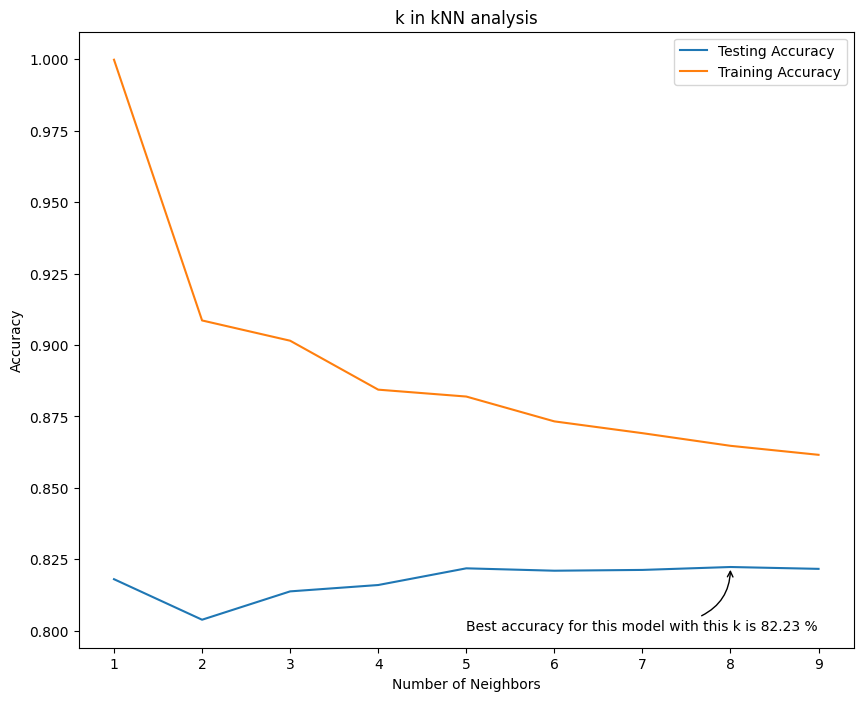

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 10)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    best_accuracy = max(test_accuracy)
    best_k = np.argmax(test_accuracy) + 1

    print("kNN algorithm accuracy is {0:.2f}% for k = {1}".format(best_accuracy * 100, best_k))

    plt.figure(figsize=(10, 8))   
    plt.title('k in kNN analysis')
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(best_accuracy * 100), xy=(best_k, best_accuracy), xytext=(5 , 0.80),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

# Call the function
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)


In [ ]:
#2-layer validation
K_outer = 10
K_inner = 10
rows = []


# Define the range of complexity-controlling parameters
lambda_values = [1,2,3,4,5] #put instead relevan ones
K_values = [1,2,3,4,5]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=11)
k_outer = 0

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]
    
    
    y_train_outer = y_train_outer.reset_index(drop=True)
    y_test_outer = y_test_outer.reset_index(drop=True)
    
    lr_innner_errors = {lmbda: [] for lmbda in lambda_values} # Initialize dictionary to store errors for each lambda
    knn_ininner_errors = {h: [] for h in h_values}
    
    for train_inner_index, test_inner_index in inner_cv.split(X_train_outer):
        X_train_inner, X_test_inner = X_train_outer[train_inner_index], X_train_outer[test_inner_index]
        y_train_inner, y_test_inner = y_train_outer[train_inner_index], y_train_outer[test_inner_index]
        
        
        # Train ridge regression models with different lambda values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_train_inner, y_train_inner)
            error = test_error(ridge_model, X_test_inner, y_test_inner)
            lambda_in_errors[lmbda].append(error)
        
        for k in k values:
            error = neural_network(h, X_train_inner, y_train_inner, X_test_inner, y_test_inner)
            ann_in_errors[h].append(error)
        
        k_inner += 1
        #end of inner loop
    
    
    
    lambda_avg_errors = {lmbda: np.mean(errors) for lmbda, errors in lambda_in_errors.items()}
    best_lambda = min(lambda_avg_errors, key=lambda lmbda: lambda_avg_errors[lmbda])
    
    h_avg_errors = {h: np.mean(errors) for h, errors in ann_in_errors.items()}
    best_h = min(h_avg_errors, key=lambda h: h_avg_errors[h])
    
    
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_train_outer, y_train_outer)
    ridge_error = test_error(ridge_model, X_test_outer, y_test_outer)
    
    
    nn_error = neural_network(best_h, X_train_outer, y_train_outer, X_test_outer, y_test_outer)
    
    # Baseline
    baseline_model = #choosebaseline
    baseline_model.fit(X_train_outer, y_train_outer)
    baseline_error = #calculate error

    #print(f'Final errors of each fold {k_outer}:', error)
    k_outer += 1
    
    rows.append({'k_outer': k_outer, 'h': best_h, 'NN error': nn_error, 'lambda': best_lambda, 'ridge_error': ridge_error, 'baseline': baseline_error})
    
two_layer_results = pd.DataFrame(rows)

In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

def LogisticRegression_algorithm(X_train, X_test, y_train, y_test, sample_size=None):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    # If sample_size is provided, perform random data sampling
    if sample_size is not None:
        total_data_points = len(X_train)
        random_indices = np.random.choice(total_data_points, size=sample_size, replace=False)
        X_train = X_train[random_indices]
        y_train = y_train[random_indices]
    
    steps = [('scaler', StandardScaler()),
             ('LogisticRegression', LogisticRegression(random_state=0))]
    
    LG_pipeline = Pipeline(steps)
    
    LG_pipeline.fit(X_train, y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

# Call the function with random data sampling (sample_size=1000 for example)
LogisticRegression_algorithm(X_train, X_test, y_train, y_test, sample_size=1000)


Accuracy: 0.38 %
              precision    recall  f1-score   support

         335       0.00      0.00      0.00         1
         336       0.00      0.00      0.00         1
         337       0.00      0.00      0.00         1
         357       0.00      0.00      0.00         3
         358       0.00      0.00      0.00         1
         360       0.00      0.00      0.00         1
         361       0.00      0.00      0.00         1
         363       0.00      0.00      0.00         2
         364       0.00      0.00      0.00         1
         367       0.00      0.00      0.00         4
         368       0.00      0.00      0.00         2
         369       0.00      0.00      0.00         1
         373       0.00      0.00      0.00         3
         377       0.00      0.00      0.00         1
         378       0.00      0.00      0.00         3
         380       0.00      0.00      0.00         1
         383       0.00      0.00      0.00         1
         3

/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Comparison of logistic regression kNN and a baseline MY COMPUTER CRACH WHEN RUNNING SOMETHING IS WRONG

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Standardizing data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Randomly sample a subset of the data
num_samples = 1000  # Number of samples to keep
sampled_indices = np.random.choice(X.shape[0], num_samples, replace=False)
X_sampled = X[sampled_indices]
y_sampled = y[sampled_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression(random_state=0))
])

# Define a range of values for the hyperparameters
param_grid_logistic = {'LogisticRegression__C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV for logistic regression
grid_logistic = GridSearchCV(logistic_pipeline, param_grid_logistic, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning for logistic regression
grid_logistic.fit(X_train, y_train)

# Retrieve the best hyperparameters and their corresponding accuracy
best_C = grid_logistic.best_params_['LogisticRegression__C']
best_accuracy_logistic = grid_logistic.best_score_

# Print the results
print(f"Best C for Logistic Regression: {best_C} with accuracy: {best_accuracy_logistic:.2f}")

# Retrain the logistic regression model with the best hyperparameters on the full training set
best_logistic = LogisticRegression(C=best_C, random_state=0)
best_logistic.fit(X_train, y_train)

# Evaluate logistic regression on the test set
logistic_test_accuracy = best_logistic.score(X_test, y_test)
print(f"Logistic Regression Test Accuracy: {logistic_test_accuracy:.2f}")


# Define a range of values for the hyperparameters for kNN
param_grid_knn = {'n_neighbors': range(1, 10)}

# Initialize GridSearchCV for kNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning for kNN
grid_knn.fit(X_train, y_train)

# Retrieve the best hyperparameters and their corresponding accuracy for kNN
best_k = grid_knn.best_params_['n_neighbors']
best_accuracy_knn = grid_knn.best_score_

# Print the results for kNN
print(f"Best k for kNN: {best_k} with accuracy: {best_accuracy_knn:.2f}")

# Retrain the kNN model with the best hyperparameters on the full training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate kNN on the test set
knn_test_accuracy = best_knn.score(X_test, y_test)
print(f"kNN Test Accuracy: {knn_test_accuracy:.2f}")

# Compare with the baseline
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")


/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Two-level cross-validation to create a table similar to Table 2

In [4]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

#Outer Cross-validation Loop and Logistic Regression
#HERE MY PC CRASH

outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Placeholder for the results
results = []

# Outer cross-validation loop
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]
    
    # Inner cross-validation for hyperparameter tuning of logistic regression
    # Define the parameter grid for logistic regression
    param_grid_logistic = {'C': [0.01, 0.1, 1, 10, 100]}
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    grid_logistic = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logistic, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_logistic.fit(X_train_outer, y_train_outer)
    best_C = grid_logistic.best_params_['C']
    
    # Evaluate logistic regression on the outer test set
    logistic_error = zero_one_loss(y_test_outer, grid_logistic.predict(X_test_outer))
    
    # Append results to the list
    results.append([best_C, logistic_error])



In [ ]:
# Inner cross-validation for hyperparameter tuning of method 2 (e.g., kNN)
# Define the parameter grid for method 2
param_grid_method2 = {'n_neighbors': range(1, 10)}

for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    grid_method2 = GridSearchCV(KNeighborsClassifier(), param_grid_method2, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_method2.fit(X_train_outer, y_train_outer)
    best_k = grid_method2.best_params_['n_neighbors']

    # Evaluate method 2 on the outer test set
    method2_error = zero_one_loss(y_test_outer, grid_method2.predict(X_test_outer))

    # Update results list
    results[i].extend([best_k, method2_error])


In [ ]:
# Evaluate the baseline model on the outer test set
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(X_train_outer, y_train_outer)
    baseline_error = zero_one_loss(y_test_outer, dummy_clf.predict(X_test_outer))

    # Update results list
    results[i].append(baseline_error)

# Convert results to DataFrame for better presentation
results_df = pd.DataFrame(results, columns=['best_C_logistic', 'logistic_error', 'best_k_method2', 'method2_error', 'baseline_error'])
print(results_df)
